<a href="https://colab.research.google.com/github/GEO-HACK/Advanced-Programming/blob/main/ml_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MY FIRST ML PROJECT

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")

df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data preparation

In [2]:
y = df["logS"]
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


## Splitting the x axis


In [3]:
x = df.drop("logS", axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### separating the data

In [9]:
from sklearn.model_selection  import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 ,random_state = 100 ,shuffle = True)





(915,) (229,)


## model building

## Linear regression



**Training the model
**

In [11]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

**applying the model for predictions**

In [13]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

print(y_lr_test_pred, y_lr_train_pred)



[-3.05722870e+00 -7.77785827e+00 -2.55016650e+00 -2.01523582e+00
 -2.06375990e+00 -9.99672215e-01 -5.94603364e-01 -5.53626003e-01
 -5.72200956e+00 -3.94006681e+00 -3.95496755e+00 -2.29737009e+00
 -1.48980354e+00 -1.48988982e+00 -4.64510806e+00 -1.90396018e+00
 -1.51566313e+00 -3.16424605e+00 -3.70863920e+00 -5.58105660e+00
 -3.25038467e+00 -5.04235077e+00 -5.69194881e+00 -2.14339849e+00
 -4.35689341e+00 -5.03964756e+00 -3.10383618e+00 -4.40286964e+00
 -4.21276272e+00  5.56508349e-01 -1.45537678e+00 -4.41027396e+00
 -2.59668773e+00 -1.53336276e+00 -5.55749874e-01 -1.67111795e+00
 -2.78163675e+00 -3.15395565e+00 -5.27083361e+00 -1.75321446e+00
 -1.53350725e+00 -2.01255666e+00 -6.57559167e+00 -7.89433046e+00
 -5.76437127e+00 -4.16422068e+00 -3.43694663e+00  1.43834212e+00
 -1.12679105e-02 -2.34521849e+00 -1.86480046e+00 -5.03964756e+00
  8.55886378e-01 -3.17679292e+00 -5.06764094e+00 -1.99464442e+00
 -7.77785827e+00 -1.21764693e+00 -9.09541075e-01 -5.04235077e+00
 -2.43898748e+00 -2.84034

**model performance**

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score (y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


print(lr_train_mse ,lr_test_mse , lr_train_r2, lr_test_r2 )

1.0075362951093687 1.0206953660861033 0.7645051774663391 0.7891616188563282


**plotting the results**

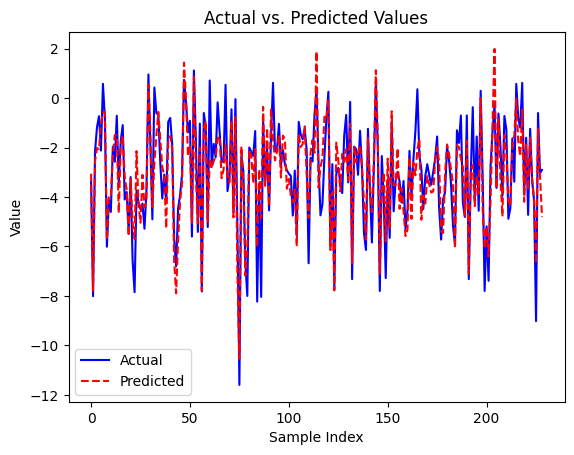

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example Data: Replace these with your actual values
actual_values = y_test  # Your actual values
predicted_values = y_lr_test_pred  # Your model's predicted values

# Create a range for the x-axis
x_range = np.arange(len(actual_values))

# Plot the actual values
plt.plot(x_range, actual_values, label="Actual", color="blue", linestyle="-")

# Plot the predicted values
plt.plot(x_range, predicted_values, label="Predicted", color="red", linestyle="--")

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()
